# Visualization code using Matplotlib library

## Studedent Income - Data Transformation


This notebook includes some examples of visualization charts using Matplotlib and Student Income database. 

### Import Libraries

In [1]:
# Import and alias Pandas
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, HTML
from sklearn import preprocessing
from scipy import stats
import numpy as np
from pandas.plotting import scatter_matrix



pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Scaling Function

In [2]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [3]:
# .. importing csv

data_train = pd.read_csv("data-release/data/final/public/train_values.csv")
label_train = pd.read_csv("data-release/data/final/public/train_labels.csv")

df = data_train
df['income'] = label_train['income']

In [4]:
display(df.income.describe())

count    17107.000000
mean        30.592003
std         11.302597
min          9.400000
25%         23.000000
50%         28.700000
75%         35.600000
max        151.500000
Name: income, dtype: float64

In [5]:
#from sklearn.cross_validation import train_test_split 
#X_train, X_test, y_train, y_test= train_test_split( df, df['income'], test_size=0.15, random_state=1 )

In [6]:
#corr_matrix = data_train.corr()

In [7]:
#display(corr_matrix['income'].sort_values(ascending=False))

### Describe Data and Slice & Dice it

Now that your dataset has been loaded, invoke the `.describe()` method to display some results about it:


Row Indexing

You can use any of the .loc[], .iloc[], or .ix[] methods to do selection by row, noting that the expected order is [row_indexer, column_indexer]:

In [8]:
# .. describing it

#print df.describe()

#print df.dtypes

display("Dataframe Shape" + str(df.shape))
#print label_train.shape

# slicing the data

#print label_train.loc[0:10, 'income']

#print df.loc[0:10, ['col1', 'col2']]



#print df.ix[:,0] used to work but is not deprecated.

#print ("===========================")
#print df.col0 # same as df['col0'] 
#print df['col0']
#print df[['col0']]

#print data_train.describe()
#display(label_train.describe())
#print label_train.head()
#pd.describe_option('display')
pd.set_option('display.max_columns', None)
#display(data_train.head(200))
#display(data_train.tail(200))
#display(df.loc[0:50,['school__ownership','school__degrees_awarded_predominant','school__degrees_awarded_predominant_recoded']])


'Dataframe Shape(17107, 299)'

### Plotting Charts

Plot a histogram for Income

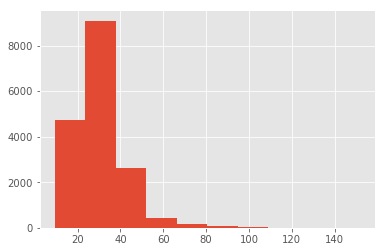

In [9]:
# .. your code here ..]

matplotlib.style.use('ggplot') 
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(df['income'], label='Income')
plt.show()

Plot a boxplot for Income and School Ownership

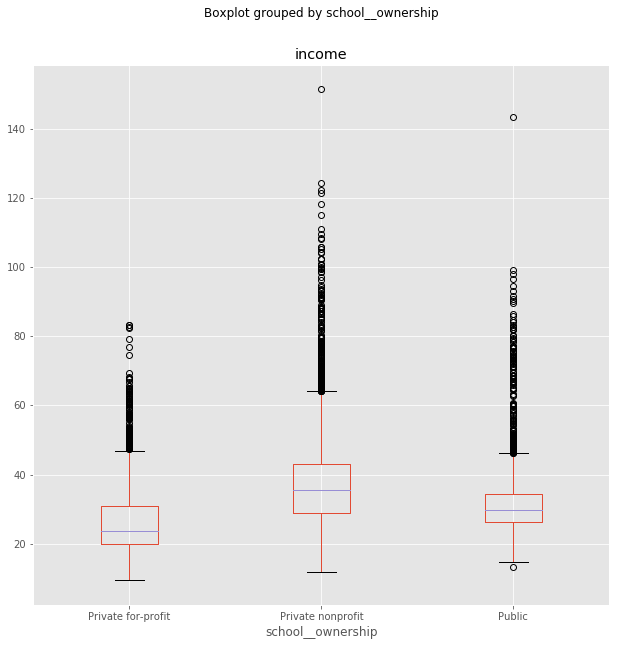

In [10]:

#ax = fig.add_subplot(111)
df.boxplot(column='income',figsize=(10, 10), by='school__ownership')
plt.show()


Draw a scatter plot for Income and School Faculty Salary

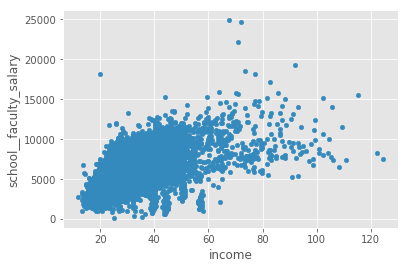

In [11]:
# .. your code here ..

# .. your code here ..
#school__faculty_salary
#ax = fig.add_subplot(111)
df.plot.scatter('income','school__faculty_salary')
plt.show()

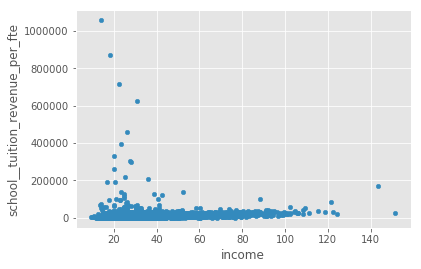

In [12]:
df.plot.scatter('income','school__tuition_revenue_per_fte')
plt.show()

#


In [13]:
df.school__tuition_revenue_per_fte.describe()
df.school__tuition_revenue_per_fte = df[df['school__tuition_revenue_per_fte'] < 400000]
df.school__tuition_revenue_per_fte.describe()

count     16235.0
unique    16235.0
top       26296.0
freq          1.0
Name: school__tuition_revenue_per_fte, dtype: float64

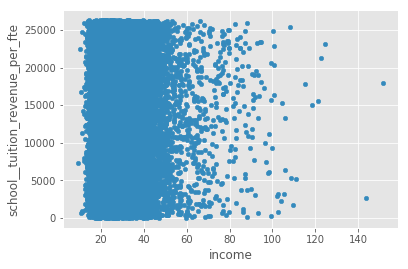

In [14]:

df.plot.scatter('income','school__tuition_revenue_per_fte')
plt.show()

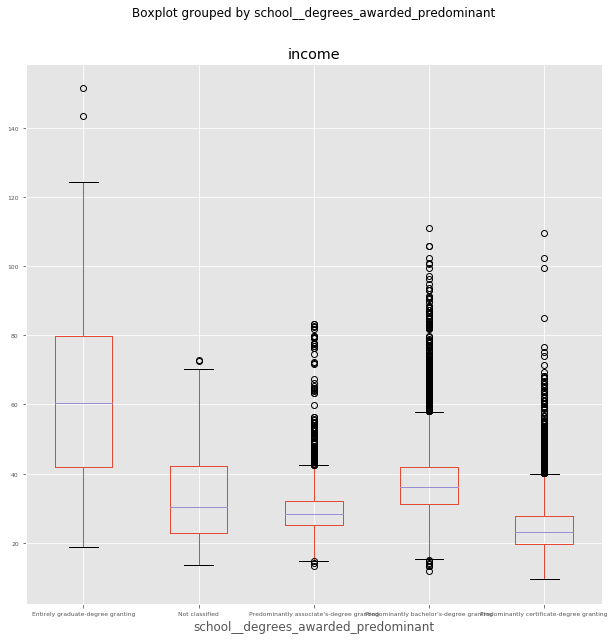

In [15]:
#ax = fig.add_subplot(111)
df.boxplot(column='income',figsize=(10, 10), by='school__degrees_awarded_predominant', fontsize=6)
plt.show()

In [16]:

df.plot.scatter('income',figsize=(10, 10), 'school__faculty_salary')

plt.show()
#plt.scatter(df['income'],['school__faculty_salary'],color='red')
#plt.scatter(df['income'],['school__faculty_salary'],color='blue')
#plt.show()
#ax = fig.add_subplot(111)
df.boxplot(column='school__faculty_salary', figsize=(10, 10), by='school__ownership')
plt.show()

#print df['income']



SyntaxError: non-keyword arg after keyword arg (<ipython-input-16-07db75a68446>, line 2)

In [ ]:
df_scatter = df[['income','school__faculty_salary','cost__tuition_out_of_state','student__share_firstgeneration',
                  'admissions__act_scores_75th_percentile_math','school__tuition_revenue_per_fte']]

scatter_matrix(df_scatter, alpha=0.2, figsize=(20, 20),  diagonal='hist', color='blue')

plt.show()

#pandas.plotting.scatter_matrix(df1_scatter, alpha=0.2, figsize=(6, 6), diagonal='hist')


In [ ]:
df_scatter = df[['income', 'admissions__act_scores_25th_percentile_math', 'admissions__act_scores_midpoint_math',
'admissions__sat_scores_25th_percentile_math',
'admissions__sat_scores_midpoint_math',
'admissions__act_scores_75th_percentile_math']]

scatter_matrix(df_scatter, alpha=0.2, figsize=(20, 20), diagonal='kde', color='blue')

plt.show()



In [ ]:
    
df_scatter = df[['income','school__instructional_expenditure_per_fte',
        'school__tuition_revenue_per_fte',
        'student__demographics_dependent',
        'school__faculty_salary',
        'student__share_independent_students',
        'student__share_firstgeneration_parents_somecollege',
        'student__demographics_first_generation',
        'student__share_firstgeneration',
        'student__size',
        'student__demographics_married',
        'student__demographics_female_share',
        'student__share_firstgeneration_parents_highschool',
        'school__degrees_awarded_predominant_recoded'
]]

scatter_matrix(df_scatter, alpha=0.2, figsize=(20, 20), diagonal='hist')

plt.show()

### Limit DataFrame to required features
### Drop Nans

In [ ]:
df = df[['student__part_time_share',
         'student__demographics_married',
         'school__tuition_revenue_per_fte',
         'student__demographics_age_entry',
         'student__demographics_dependent',
         'student__demographics_female_share',
         'student__demographics_first_generation',
         'school__degrees_awarded_highest',
         'school__degrees_awarded_predominant_recoded',
         'school__instructional_expenditure_per_fte',
         'school__online_only',
         'student__size',
         'student__share_independent_students',
         'school__ownership',
         'school__degrees_awarded_predominant',
         'income'
         ]]



Print some rows with the trimmed down features.

In [ ]:
#print df.head()
display(df.head())

### Change categorical features to numerical features using Dummies()

In [ ]:
df = pd.get_dummies(df)
#print df.head()
#display(df.head())
#print df.select('school__degrees_awarded_highest')

print ("dropping nans")
#df.dropna(axis=0, how='any', inplace=True)
df = df.fillna(df.mean())
label_train = df['income']

df.drop(labels=['income'], inplace=True, axis=1)
display(df.head())
#df = scaleFeaturesDF(df)
df = pd.DataFrame(preprocessing.scale(df))
display(df.head())

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(df, label_train)
#print X.corr()
print df.shape

In [ ]:
# Sum of Squared Distances
#np.sum(model.predict(X_test) - y_test) ** 2)

## Load Testing Data

In [ ]:
data_test = pd.read_csv("data-release/data/final/public/test_values.csv")

In [ ]:
display(data_test.head())

In [ ]:
data_test_reduced = data_test[[
         'student__part_time_share',
         'student__demographics_married',
         'school__tuition_revenue_per_fte',
         'student__demographics_age_entry',
         'student__demographics_dependent',
         'student__demographics_female_share',
         'student__demographics_first_generation',
         'school__degrees_awarded_highest',
         'school__degrees_awarded_predominant_recoded',
         'school__instructional_expenditure_per_fte',
         'school__online_only',
         'student__size',
         'student__share_independent_students',
         'school__ownership',
         'school__degrees_awarded_predominant',
         ]]

data_test_reduced = pd.get_dummies(data_test_reduced)
#data_test_reduced.dropna(axis=0, how='any', inplace=True)
data_test_reduced = data_test_reduced.fillna(data_test_reduced.mean())
#data_test_reduced = scaleFeaturesDF(data_test_reduced)
data_test_reduced = pd.DataFrame(preprocessing.scale(data_test_reduced))
print data_test_reduced.shape

In [ ]:
predictions = model.predict(data_test_reduced)

In [ ]:
print predictions
print predictions.dtype

In [ ]:
print data_test_reduced.shape
print data_test.shape

In [ ]:
print predictions.shape

In [ ]:
results = pd.DataFrame(data_test['row_id'])
results['income'] = pd.DataFrame(predictions)
results = results.loc[:,['row_id', 'income']]

display(results.head())
print results.shape

In [ ]:
results.to_csv("data-release/data/final/public/final_results.csv")